In [97]:
from ete3 import Tree, faces, AttrFace, TreeStyle
import math
import re

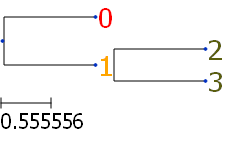

In [115]:
colors = ['red', 'orange', '#5a5e0e', 'green', 'blue', 'purple']
def my_layout(node):    
    try:
        val = int(node.name)
    except ValueError:
        return
    
    color = colors[val.bit_length() % len(colors)]
        
    name_face = AttrFace("name", fgcolor=color)
    # Adds the name face to the image at the preferred position
    faces.add_face_to_node(name_face, node, column=0, position="branch-right")

ts = TreeStyle()
# Do not add leaf names automatically
ts.show_leaf_name = False
# Use my custom layout
ts.layout_fn = my_layout

t = Tree("(0,(2,3)1)-;", format=8)
# Tell ETE to use your custom Tree Style
t.render("%%inline", tree_style=ts)

In [116]:
2**4

16

In [117]:
def build_tree_spec(base, depth):
    spec = "("
    template = "("
    for n in range(base):
        spec += str(n) + ","
        template += "{" + str(n+1) + "},"
    
    template = template[0:-1] + "){0}"
    spec = spec[0:-1] + ")-;"
    
    highest = base-1
    
    for n in range(1, (base**depth)):
        #print(spec)
        insert = template.format(n, *[i for i in range(highest+1, highest+base+1)])
        spec = re.sub('([^0-9]){0}([^0-9])'.format(n), r'\1' + insert + r'\2', spec)
        highest += base
    
    return spec
    
    
spec = build_tree_spec(2,4)

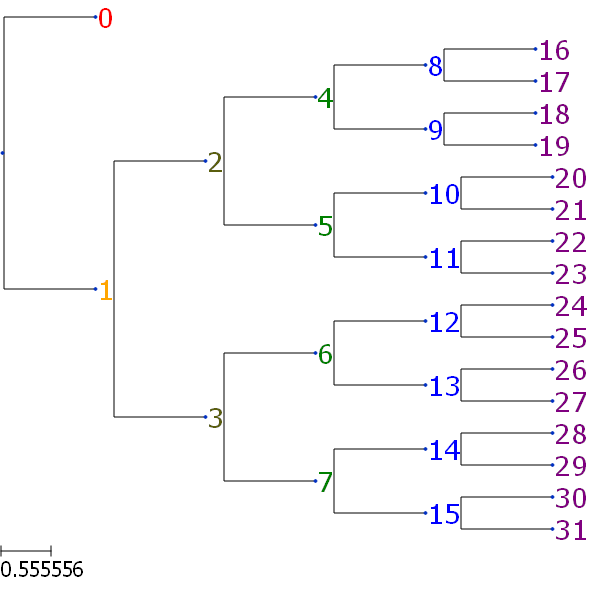

In [118]:
t = Tree(spec, format=8)
t.render("%%inline", tree_style=ts)

(0,(2,3)1)-;
(0,((((16,17)8,(18,19)9)4,((20,21)10,(22,23)11)5)2,(((24,25)12,(26,27)13)6,((28,29)14,(30,31)15)7)3)1)-;


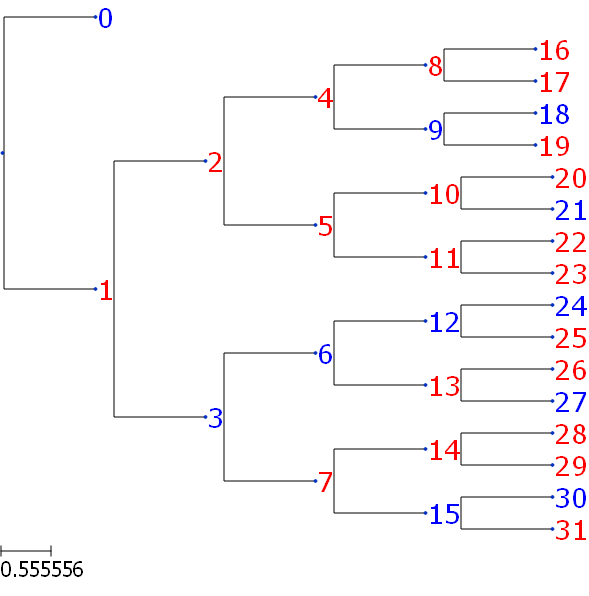

In [49]:
spec = "(0,(2,3)1)-;"
n = 2
highest = 3
template = "({after1},{after2}){current}"
print(spec)

for n in range(2,16):
    insert = template.format(after1=highest+1, after2=highest+2, current=n)
    spec = spec.replace(str(n), insert)
    highest += 2
    #print(spec)
    
print(spec)
t = Tree(spec, format=8)
t.render("%%inline", tree_style=ts)

In [77]:
x = 7
math.floor(math.log(x,2))

2